In [1]:
%pip install pandas
%pip install transformers
%pip install torch
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('spam_re_labelled_vNew.csv', sep=';', encoding='latin1')
df

,text,re_labelled
0,"@thorxxrahman Enggeh leres masuk kec.Ngaglik, ...",HAM
1,Personil Polres mukomuko melaksanakan Sosialis...,HAM
2,ga enaknya rumah pinggir jalan besar + ada bay...,HAM
3,@KangManto123 Berarti pengusaha knalpot brong ...,HAM
4,@zeynixxtflhn Beli knalpot blombongan ga?,HAM
...,...,...
455,Gayaa,HAM
456,"golek tambahan kiper mbok an, ngawekani nek ik...",HAM
457,Ayoo lekk semngat sampai juara dunia Indonesia...,HAM
458,????????????,SPAM


# Combined Dataset

In [6]:
df.rename(columns={'re_labelled': 'Kategori', 'text': 'Pesan'}, inplace=True)
df

,Pesan,Kategori
0,"@thorxxrahman Enggeh leres masuk kec.Ngaglik, ...",HAM
1,Personil Polres mukomuko melaksanakan Sosialis...,HAM
2,ga enaknya rumah pinggir jalan besar + ada bay...,HAM
3,@KangManto123 Berarti pengusaha knalpot brong ...,HAM
4,@zeynixxtflhn Beli knalpot blombongan ga?,HAM
...,...,...
455,Gayaa,HAM
456,"golek tambahan kiper mbok an, ngawekani nek ik...",HAM
457,Ayoo lekk semngat sampai juara dunia Indonesia...,HAM
458,????????????,SPAM


In [7]:
df1 = pd.read_csv('combined_dataset.csv')
df1

,Kategori,Pesan,source
0,spam,Secara alami tak tertahankan identitas perusah...,email_spam_indo
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...,email_spam_indo
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...,email_spam_indo
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...,email_spam_indo
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak...",email_spam_indo
...,...,...,...
6410,ham,Pengingat halo semuanya: Vince telah meminta s...,spam
6411,ham,Re: Argentina Power & Gas Market Modeling Oke ...,spam
6412,ham,"Re: Program Enron / Stanford Stinson, hebat! S...",spam
6413,ham,"Persetujuan untuk peninjau Roberts JR, Michael...",spam


In [8]:
gabungan_df = pd.concat([df, df1], ignore_index=True)

# Jika ingin memastikan hanya kolom 'Kategori' dan 'Pesan' yang ada
gabungan_df = gabungan_df[['Kategori', 'Pesan']]
gabungan_df

,Kategori,Pesan
0,HAM,"@thorxxrahman Enggeh leres masuk kec.Ngaglik, ..."
1,HAM,Personil Polres mukomuko melaksanakan Sosialis...
2,HAM,ga enaknya rumah pinggir jalan besar + ada bay...
3,HAM,@KangManto123 Berarti pengusaha knalpot brong ...
4,HAM,@zeynixxtflhn Beli knalpot blombongan ga?
...,...,...
6870,ham,Pengingat halo semuanya: Vince telah meminta s...
6871,ham,Re: Argentina Power & Gas Market Modeling Oke ...
6872,ham,"Re: Program Enron / Stanford Stinson, hebat! S..."
6873,ham,"Persetujuan untuk peninjau Roberts JR, Michael..."


In [9]:
gabungan_df.to_csv('gabungan_dataset.csv', index=False)

# Re-train Model

In [13]:
# Install libraries
%pip install transformers datasets scikit-learn seaborn matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 494 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 32.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 31.2 MB 33.8 MB/s eta 0:00:01
     |████████████████████████████████| 193 kB 25.2 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 33.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 26.3 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 467 kB 2.7 MB/s eta 0:00:01
     |█████████████████████

In [14]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Dataset
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load dataset
df = pd.read_csv("gabungan_dataset.csv")
df['Kategori'] = df['Kategori'].str.lower()
df['Kategori'] = df['Kategori'].apply(lambda x: 1 if x == 'spam' else 0)
df

,Kategori,Pesan
0,0,"@thorxxrahman Enggeh leres masuk kec.Ngaglik, ..."
1,0,Personil Polres mukomuko melaksanakan Sosialis...
2,0,ga enaknya rumah pinggir jalan besar + ada bay...
3,0,@KangManto123 Berarti pengusaha knalpot brong ...
4,0,@zeynixxtflhn Beli knalpot blombongan ga?
...,...,...
6870,0,Pengingat halo semuanya: Vince telah meminta s...
6871,0,Re: Argentina Power & Gas Market Modeling Oke ...
6872,0,"Re: Program Enron / Stanford Stinson, hebat! S..."
6873,0,"Persetujuan untuk peninjau Roberts JR, Michael..."


In [18]:
tokenizer = AutoTokenizer.from_pretrained("nahiar/spam-detection-bert-v1")
model = AutoModelForSequenceClassification.from_pretrained("nahiar/spam-detection-bert-v1")

In [19]:
# Preprocessing - Tokenize the email messages
def tokenize_function(text):
    # Fungsi untuk men-tokenisasi teks email dan mengubahnya menjadi input untuk model
    return tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors="pt")

In [20]:
# Tokenizing email messages
texts = list(df['Pesan'])  # Mengambil semua teks dari kolom 'Pesan'
labels = list(df['Kategori'])  # Mengambil semua Kategori (0 atau 1)
tokenized_texts = [tokenize_function(text) for text in texts]  # Tokenisasi semua teks

In [21]:
# Prepare input tensors for PyTorch
# Menggabungkan token input dan attention mask menjadi tensor yang siap digunakan untuk training
input_ids = torch.cat([x['input_ids'] for x in tokenized_texts], dim=0)
attention_masks = torch.cat([x['attention_mask'] for x in tokenized_texts], dim=0)
labels = torch.tensor(labels)

In [22]:
# Membagi dataset menjadi data training dan data validasi (80% training, 20% testing)
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2)
train_masks, val_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.2)

In [23]:
# Membuat DataLoader untuk mini-batch training dan validation
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = torch.utils.data.RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = torch.utils.data.SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [24]:
# Training setup
from torch.optim import AdamW

# Optimizer digunakan untuk mengupdate parameter model selama training
optimizer = AdamW(model.parameters(), lr=2e-5)

In [25]:
from tqdm import tqdm

epochs = 3
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train()

    total_loss = 0

    # Tambahkan tqdm untuk loop training
    train_loop = tqdm(train_dataloader, desc="Training", leave=False)

    for batch in train_loop:
        batch_input_ids, batch_attention_mask, batch_labels = batch

        optimizer.zero_grad()

        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        # Update progress bar dengan current loss
        train_loop.set_postfix(loss=loss.item())

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss:.4f}")

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    predictions_list = []
    true_labels_list = []

    val_loop = tqdm(validation_dataloader, desc="Validating", leave=False)

    with torch.no_grad():
        for batch in val_loop:
            batch_input_ids, batch_attention_mask, batch_labels = batch
            outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)

            predictions_list.extend(predictions.tolist())
            true_labels_list.extend(batch_labels.tolist())

            correct += (predictions == batch_labels).sum().item()
            total += batch_labels.size(0)

    accuracy = correct / total
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Epoch 1/3


Average training loss: 0.0451


Validation Accuracy: 98.55%

Epoch 2/3


Average training loss: 0.0138


Validation Accuracy: 98.55%

Epoch 3/3


Average training loss: 0.0069


Validation Accuracy: 98.40%


Confusion Matrix:
[[709   4]
 [ 18 644]]


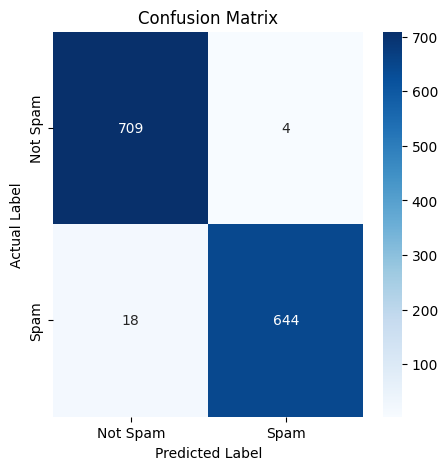

In [26]:
# Confusion Matrix & Evaluation Metrics
cm = confusion_matrix(true_labels_list, predictions_list)
print(f"Confusion Matrix:\n{cm}")

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Generate and print the classification report
classification_rep = classification_report(true_labels_list, predictions_list, target_names=['not spam', 'spam'])
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

    not spam       0.98      0.99      0.98       713
        spam       0.99      0.97      0.98       662

    accuracy                           0.98      1375
   macro avg       0.98      0.98      0.98      1375
weighted avg       0.98      0.98      0.98      1375



In [28]:
# Save model

model.save_pretrained("nahiar-spam-detection-bert-v2")
tokenizer.save_pretrained("nahiar-spam-detection-bert-v2")

('nahiar-spam-detection-bert-v2/tokenizer_config.json',
 'nahiar-spam-detection-bert-v2/special_tokens_map.json',
 'nahiar-spam-detection-bert-v2/vocab.txt',
 'nahiar-spam-detection-bert-v2/added_tokens.json',
 'nahiar-spam-detection-bert-v2/tokenizer.json')

In [ ]:
# Define a function
def predict_spam(text, model, tokenizer):
    # Tokenisasi input teks dan prediksi
    inputs = tokenizer(text, returns_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probs = outputs.logits.softmax(1)
    return "Spam" if torch.argmax(probs) == 1 else "Not Spam"

In [30]:
# Percobaan prediksi apakah pesan adalah spam atau bukan
input_text = 'Senin, 21 Juli 2025, Samapta Polsek Ngaglik melaksanakan patroli stasioner balong jalan palagan donoharjo serta antisipasi gangguan Kamtibmas, Curat, Curas, Curan dan kejahatan jalanan di wilayah Ngaglik. https://t.co/TyIvxehCV9'
print(predict_spam(input_text, model, tokenizer))

Not Spam


In [31]:
input_text = 'lacak hp hilang by no hp / imei lacak penipu/scammer/tabrak lari/terror/revengeporn sadap / hack / pulihkan akun #zonauang #zonauang?'
print(predict_spam(input_text, model, tokenizer))

Spam


In [32]:
input_text = 'Sewa Rumah Dekat UNY Yogya Malioboro 15mnt Plembura Harian Bulanan Mingguan Rmahan Luas 2KT Keluarga 300rb 1 rumah 2 KT 2 KM WA https://t.co/Gs4wck2Euz #penginapandekatUNY,  #homestaykeluargajogja,  #homestayrombonganjogja, #homestayjogjamurah, #homestayjogja https://t.co/ckEwDfGnRk'
print(predict_spam(input_text, model, tokenizer))

Not Spam
